<a href="https://colab.research.google.com/github/orkunguldali/MachineLearningFundamentalsLecture/blob/main/MachineLearningAnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

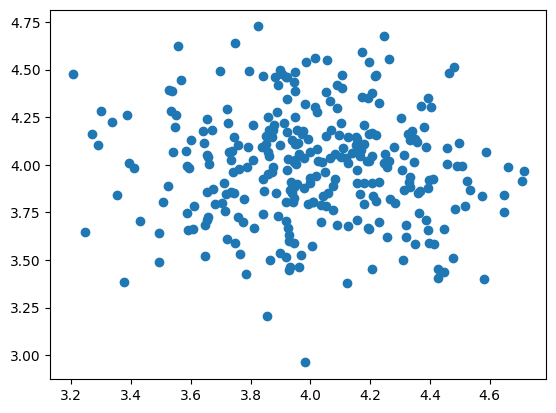

In [22]:
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

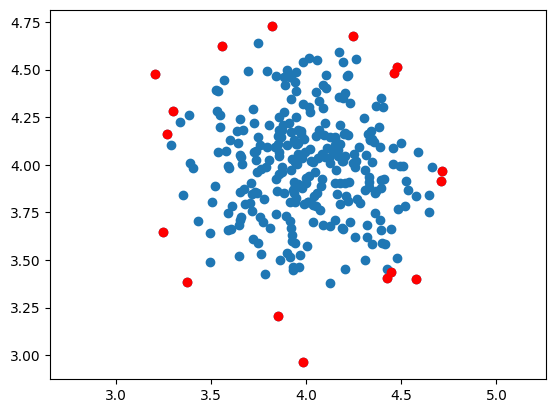

In [23]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
#print(pred)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

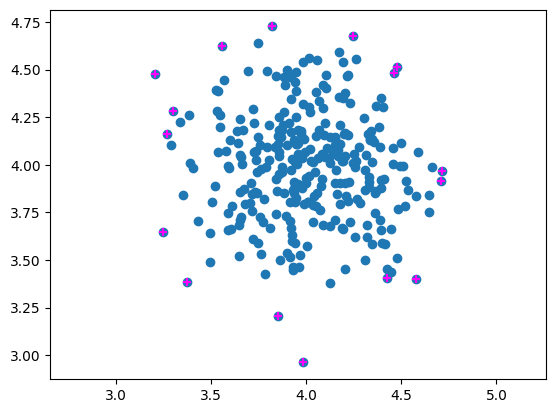

In [24]:
plt.scatter(x[:,0],x[:,1])
#plt.scatter(values[1,0],values[:,1],color='red')
plt.axis('equal')
supvectors2=SVMmodelOne.support_vectors_
plt.scatter(supvectors2[:,0],supvectors2[:,1],color='magenta',marker='+')

14.976152770416562


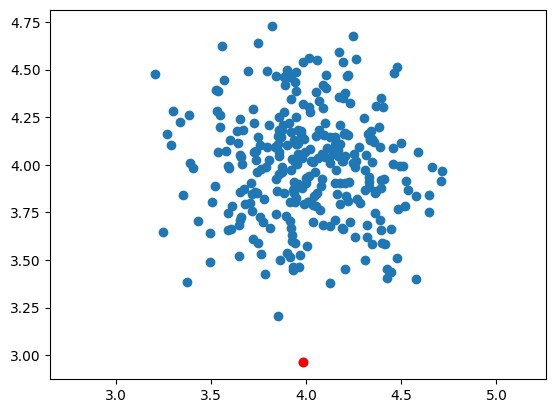

In [25]:
scores = SVMmodelOne.score_samples(x)

#print(scores)

thresh = quantile(scores, 0.001)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()